# Quick Start - Vector Query

Fundamentally, there are two types of geospatial data: raster and vector data. Typical of the former are satellite and drone images, yet also any other continuous (rasterized) data product such as the output of numerical weather prediction models, elevation data, soil properties et cetera. When talking about vector data, we refer to data for which the spatial component takes a specific shape. This might be a point, yet also an extended area, namely a polygon. Examples would be measurements taken at weather stations (points), yet also the population of a city or the GDP of a country, where the spatial attribute would be the area covered by the city of the country.

When interacting with Geospatial Analytics, raster and vector data behave essentially in the same way. Indeed, they can be used in the same query, as we will discuss later.

## Basic Vector Queries

Queries to vector data are almost identical to those for raster data, so we recommend reading through the [Quick Start - Raster Query](quickstartrasterquery.ipynb) page first. 

Here is the JSON for a sample vector data query:
```
  {
    "layers" : [
        {"type" : "vector", "id" : "P265C4176"}
    ],
    "spatial" : {"type" : "poly",  "aoi" : 24},
    "temporal" : {"intervals" : [
        {"start" : "2018-11-13T00:00:00Z", "end" : "2018-11-14T00:00:00Z"}
    ]},
    "publish" : false,
    "outputType" : "csv"
  }
```

The fundamental differences to raster queries are in the ``layers`` block. Here, the ``type`` is ``vector``. IDs for vector data are alphanumeric. P265C4176 contains near real time (NRT) active fire data from the *Near real time earth observations (NASA LANCE)* data set, which is based on data from NASA's `Fire Information for Resource Management System (FIRMS) <https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms>`_. Note that we instruct 
Geospatial Analytics to return the vector data in csv form (``"outputType" : "csv"``). In this form, the returned data returns no information on the shape of the polygon, just only the values. This generally speeds up the query since the information on the polygons does not have to be generated and transmitted and is especially useful when requesting a large number of timestamps. (E.g. for a time-series with a million entries and the same spatial geometry, the returned data would otherwise contain a million copies of the same polygon. For a complicated polygon such as the outline of a country, this can be a significant overhead.) We use ``"publish" : False`` since we are not publishing the query to the Geospatial Analytics geoserver. (This, too, improves query performance.)

Finally, note that we are not selecting a point or a rectangle, but a polygon:

```
   {"spatial" : {"type" : "poly",  "aoi" : 24}}
```

We can submit and monitor the query and also download the data in the same way we did in the [Quick Start - Raster Query](quickstartrasterquery.ipynb) page. The pattern of the following code snippet should be familiar:

In [2]:
import os
import pandas as pd
import ibmpairs.authentication as authentication
import ibmpairs.client as client
import ibmpairs.query as query

# Best practice is not to include secrets in source code so we read 
# a user name and password from operating system environment variables. 
# You could set the user name and password in-line here but we don't  
# recommend it for security reasons.
EIS_USERNAME=os.environ.get('EIS_USERNAME')
EIS_APIKEY=os.environ.get('EIS_APIKEY')

# Create an authentication object with credentials.
credentials  = authentication.OAuth2(username = EIS_USERNAME,
                                     api_key  = EIS_APIKEY)

# Add the credentials object to a client object.
eis_client = client.Client(authentication = credentials)

query_json =   {
    "layers" : [
        {"type" : "vector", "id" : "P265C4176"}
    ],
    "spatial" : {"type" : "poly",  "aoi" : 24},
    "temporal" : {"intervals" : [
        {"start" : "2018-11-13T00:00:00Z", "end" : "2018-11-14T00:00:00Z"}
    ]},
    "publish" : "false",
    "outputType" : "csv"
  }

# Submit the query
query_result = query.submit_check_status_and_download(query_json)

# Find layer files to load from downloaded zip.
files = query_result.list_files()
print("Downloaded file = '" + os.path.basename(files[0]) + "'")

2021-12-06 10:53:36 - paw - INFO - The '<class 'str'>' value 'false' was converted to a boolean 'False'.
2021-12-06 10:53:36 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2021-12-06 10:53:37 - paw - INFO - The query was successfully submitted with the id: 1638766800_21216699.
2021-12-06 10:53:37 - paw - INFO - The query 1638766800_21216699 has the status Queued.
2021-12-06 10:54:08 - paw - INFO - The query 1638766800_21216699 has the status Succeeded.
2021-12-06 10:54:08 - paw - INFO - The query 1638766800_21216699 was successful after checking the status.
2021-12-06 10:54:38 - paw - INFO - The query 1638766800_21216699 has the status Succeeded.
2021-12-06 10:54:38 - paw - INFO - The query 1638766800_21216699 was successful after checking the status.
2021-12-06 10:54:38 - paw - INFO - The query download folder is set to the path C:\simongit\PAIRS\pairs-userdoc\source\notebooks\quickstart\download/.
2021-12-06 10:54:38 - paw - INFO - The query zip for 1638766800_212166

As with the raster query in the [Quick Start - Raster Query](quickstartrasterquery.ipynb) page the ``query.submit_check_status_and_download(query_json)`` funtion submits the query, waits for the query to complete, downloads the resulting zip file to a folder in the download folder named after the query ID and then unzips it. In this case the resulting directory contains the following:

```
STATUS
Vector_Data_Output.csv
```
The STATUS file just indicates the status of the query. Success in this case. The "Vector_Data_Output.csv" file contains the data resulting from the query. We can load this file into a pandas data frame and see what it looks like:

In [1]:
import pandas as pd

vector_df = pd.read_csv("download/1638766800_21216699/Vector_Data_Output.csv")
vector_df

,DataSet,Name,Time,Latitude,Longitude,Region,Unit,Value,PropertyString
0,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T06:30:00Z,39.827,-121.379,,MW,35.2,'daynight:N;satellite:T;version:6.0NRT'
1,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T06:30:00Z,39.780,-121.391,,MW,28.3,'daynight:N;satellite:T;version:6.0NRT'
2,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T06:30:00Z,36.410,-118.734,,MW,41.0,'daynight:N;satellite:T;version:6.0NRT'
3,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T06:30:00Z,36.411,-118.729,,MW,38.9,'daynight:N;satellite:T;version:6.0NRT'
4,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T06:30:00Z,39.843,-121.443,,MW,38.1,'daynight:N;satellite:T;version:6.0NRT'
...,...,...,...,...,...,...,...,...,...
98,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T20:10:00Z,37.419,-105.275,,MW,14.5,'daynight:D;satellite:A;version:6.0NRT'
99,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T20:10:00Z,37.043,-106.663,,MW,70.9,'daynight:D;satellite:A;version:6.0NRT'
100,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T20:10:00Z,37.044,-106.651,,MW,18.2,'daynight:D;satellite:A;version:6.0NRT'
101,Near real time earth observations (NASA LANCE),active_fire_data_firms_modis_c6_nrt:frp,2018-11-13T20:10:00Z,35.943,-112.147,,MW,32.8,'daynight:D;satellite:A;version:6.0NRT'


<div class="alert alert-info">
Recall that raster layers had a fixed spatial resolution? There is a similar concept for vector layers. Here, the resolution determines the search radius for point queries. I.e. if the resolution of a vector layer is d degrees, a point query will return all points with in a box of size 2d x 2d centered around the location queried. Just as for raster data, this resolution is determined by the *level* of the vector layer. And just as for raster layers, the relation between the level and the resolution is

$$
    10^{-6} \times 2^{29-l}
$$
</div>


## Visualizing the data
We can use the [basemap](https://matplotlib.org/basemap/) module to visualize the vector data.
<div class="alert alert-info">
Note that installing Python modules that have binary dependencies can be a challenge on Windows as getting the environment set up correctly so that the build works is very difficult. It is often easier to install a pre-built  wheel file (.whl). There are various resources out there on the internet that help you install wheel files directly, for example, https://stackoverflow.com/questions/33020202/how-to-install-matplotlibs-basemap
</div>

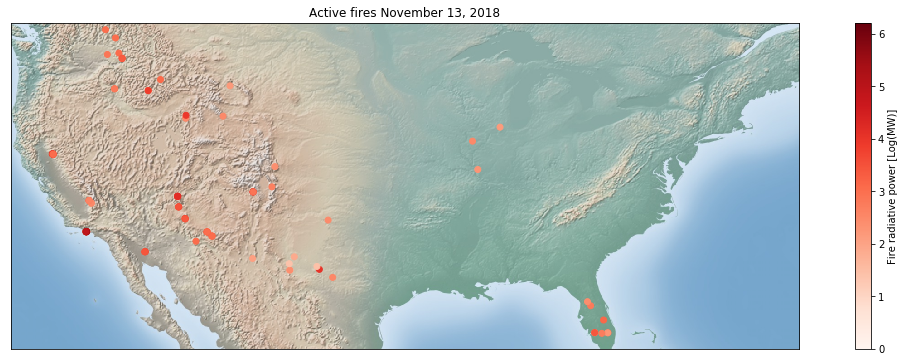

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

m = Basemap(
      projection = 'cyl', resolution = 'l',
      llcrnrlat = 25.5, llcrnrlon = -124.5, urcrnrlat = 49.5, urcrnrlon = -66.5
)

c_map = plt.get_cmap('Reds')
c_norm = mpl.colors.Normalize(0, np.log(vector_df['Value'].max()))
c_mixer = mpl.cm.ScalarMappable(c_norm, c_map)

plt.figure(figsize = (20, 6))
ax = mpl.pyplot.axes()
m.shadedrelief()
m.scatter(
      x = vector_df['Longitude'],
      y = vector_df['Latitude'],
      c = c_mixer.to_rgba(np.log(vector_df['Value']))
)
plt.title('Active fires November 13, 2018')
ax, _ = mpl.colorbar.make_axes(ax, orientation = 'vertical')
c_bar = mpl.colorbar.ColorbarBase(ax, c_map, c_norm, orientation = 'vertical')
c_bar.set_label('Fire radiative power [Log(MW)]')
plt.show()